In [1]:
import pandas as pd
import pickle
df = pickle.load(open('splitbytime/time_210312_to_210411.p','rb'))

In [2]:
df

,created_at,channel_id,entry_id,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,voltage,altitude,wind,no_sats,hdope,temperature,humidity
73,2021-03-12 05:08:57,870144,165993,41.50,51.67,41.62,49.55,0.307027,32.651630,3.52,1155.1,0.02,NaN,67.0,0.0,27769.0
74,2021-03-12 05:11:43,870144,165995,49.43,62.93,49.62,62.47,0.307019,32.651608,3.56,1155.6,0.03,NaN,64.0,0.0,27769.0
81,2021-03-12 05:15:54,870144,165998,58.78,72.08,58.02,69.23,0.307013,32.651623,3.61,1165.1,0.01,NaN,66.0,0.0,27769.0
85,2021-03-12 05:17:16,870144,165999,73.58,83.75,69.02,79.47,0.307009,32.651634,3.63,1161.1,0.02,NaN,72.0,0.0,27769.0
89,2021-03-12 05:24:27,870144,166004,51.50,59.55,49.48,56.95,0.307022,32.651615,3.68,1162.7,0.00,NaN,67.0,0.0,27769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954764,2021-04-10 20:31:32,832253,432752,37.33,46.53,17.67,23.30,0.271547,32.556038,4.68,1157.3,0.00,16.0,70.0,0.0,0.0
954767,2021-04-10 18:36:47,832253,432678,64.63,73.65,34.18,45.37,0.271582,32.556072,4.68,1164.7,0.00,16.0,60.0,0.0,0.0
954768,2021-04-10 20:20:25,832253,432744,61.68,74.97,46.92,61.90,0.271583,32.556084,4.68,1166.3,0.00,16.0,60.0,0.0,0.0
954769,2021-04-10 19:47:04,832253,432720,96.53,103.72,43.85,60.70,0.271557,32.556149,4.68,1175.2,0.00,16.0,60.0,0.0,0.0


In [5]:
import GPy
import numpy as np

In [70]:
X = np.array([[1,2,3,4,5]]).T
Y = 1+np.cos(X)+np.random.randn(5,1)*0.1
k = GPy.kern.RBF(1) #GPy.kern.Linear(1)
m = GPy.models.GPRegression(X,Y,k)
m.optimize()

In [71]:
#m.Gaussian_noise = 0.00001
#m.kern.lengthscale=0.01

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fc2514eda00>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fc2514edee0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fc2514f91c0>]}

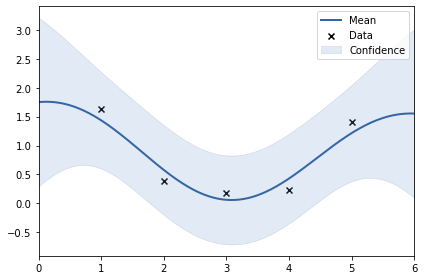

In [72]:
m.plot()

In [73]:
Xtest = np.array([[6.0]])
ytest = np.cos(6.0)

In [74]:
predmean, predvar = m.predict(Xtest)

In [75]:
import scipy.stats
print(Xtest,ytest)
#this gives us the density at y=6, given X=6.
probdensity = scipy.stats.norm(predmean[0,0],np.sqrt(predvar[0,0])).pdf(ytest)
#NLPD is...
-np.log(probdensity) #we want to minimise this.

[[6.]] 0.960170286650366


0.9440459551764929